In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import math

netflix = pd.read_csv("/Users/Michela/Desktop/netflix_titles.csv")
netflix = netflix.drop(['show_id'], axis=1)

#change the date/time
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = (netflix['date_added'].dt.year)
netflix['month_added'] = (netflix['date_added'].dt.month)

netflix['year_added']





netflix['season'] = netflix.apply( lambda x: x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis=1 )
netflix['film_length'] = netflix.apply(lambda x: x['duration'].split(" ")[0] if "min" in x["duration"] else "", axis=1)





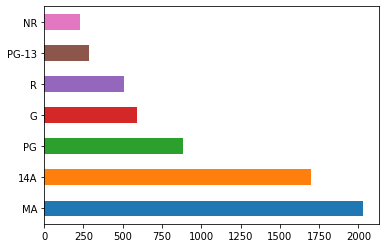

In [3]:
#need to clean up the ratings
netflix['rating'].value_counts().plot.barh()

#majority are TV-MA - very few children's items

#catorgies: R, MA, 14A, PG-13, PG, G, NR

#UR -> NR
#NC-17 ->MA
#TV-Y7-FV, TV-Y, TY-G -> G
#TV-PG -> PG
#TV-14 -> 14A
#TV-MA -> MA

netflix['rating'] = netflix['rating'].map({'UR': "NR", 'NC-17': "MA", "TV-MA":"MA", "TV-Y7-FV":"G", "G":"G",
                                              "TV-Y":"G", "TV-G":"G", "TV-Y7":"G","PG":"PG", "NR":"NR","PG-13":"PG-13",
                                              "R":"R", "TV-PG":"PG", "TV-14":"14A"})

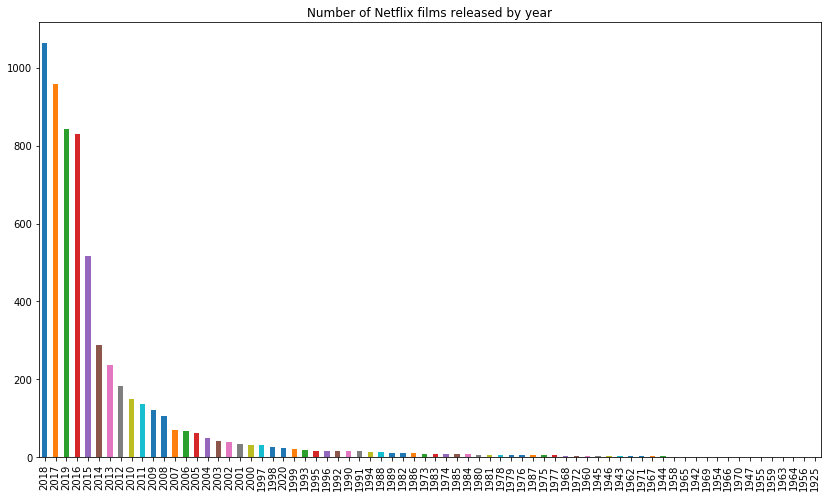

In [4]:
#okay, let's start looking at when things are released and when they are uploaded 
netflix['release_year'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Netflix films released by year")



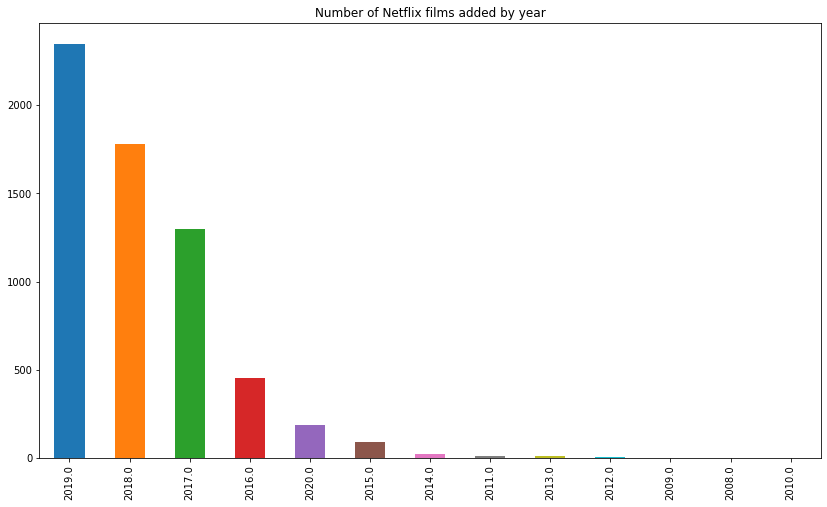

In [5]:
netflix['year_added'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Netflix films added by year")
#earliest year items were added is 2010 - makes sense since Netlix only started around then

In [6]:
netflix['country'].value_counts()

United States                                                          2032
India                                                                   777
United Kingdom                                                          348
Japan                                                                   176
Canada                                                                  141
South Korea                                                             136
Spain                                                                   117
France                                                                   90
Mexico                                                                   83
Turkey                                                                   79
Australia                                                                71
Taiwan                                                                   69
Hong Kong                                                                51
Thailand    

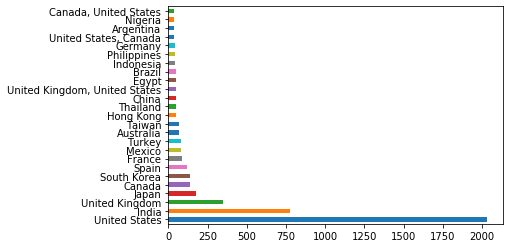

In [7]:
#country of origin are 554 - let's see the top 25 countries 
netflix['country'].value_counts().nlargest(25).plot.barh()

In [8]:
netflix['type'].value_counts()
# a majority of items on netflix are films

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [9]:
netflix = pd.get_dummies(netflix, prefix=['rating', 'type'], columns=['rating', 'type'])

In [10]:
#see the correlation matrix
corr_netflix = netflix.corr()
corr_netflix.style.background_gradient(cmap='coolwarm')
#no strong associations between the values

,release_year,year_added,month_added,rating_G,rating_NR,rating_PG,rating_PG-13,rating_R,type_Movie,type_TV Show
release_year,1,0.0468064,-0.0218675,0.0100481,-0.0693846,-0.103337,-0.134249,-0.130066,-0.16788,0.16788
year_added,0.0468064,1,-0.144186,-0.0519218,-0.257243,-0.0272329,0.125347,0.110334,0.0112755,-0.0112755
month_added,-0.0218675,-0.144186,1,0.00257517,-0.0103874,0.0126465,-0.00265637,-0.0172538,-0.0370936,0.0370936
rating_G,0.0100481,-0.0519218,0.00257517,1,-0.0627393,-0.131882,-0.0710963,-0.0965729,-0.179607,0.179607
rating_NR,-0.0693846,-0.257243,-0.0103874,-0.0627393,1,-0.0787092,-0.0424314,-0.0576363,0.101877,-0.101877
rating_PG,-0.103337,-0.0272329,0.0126465,-0.131882,-0.0787092,1,-0.0891934,-0.121155,0.0094186,-0.0094186
rating_PG-13,-0.134249,0.125347,-0.00265637,-0.0710963,-0.0424314,-0.0891934,1,-0.0653136,0.148991,-0.148991
rating_R,-0.130066,0.110334,-0.0172538,-0.0965729,-0.0576363,-0.121155,-0.0653136,1,0.199858,-0.199858
type_Movie,-0.16788,0.0112755,-0.0370936,-0.179607,0.101877,0.0094186,0.148991,0.199858,1,-1
type_TV Show,0.16788,-0.0112755,0.0370936,0.179607,-0.101877,-0.0094186,-0.148991,-0.199858,-1,1


In [11]:
netflix['listed_in'].value_counts()
#461 different values

Documentaries                                                             299
Stand-Up Comedy                                                           273
Dramas, International Movies                                              248
Dramas, Independent Movies, International Movies                          186
Comedies, Dramas, International Movies                                    174
Kids' TV                                                                  159
Documentaries, International Movies                                       150
Children & Family Movies, Comedies                                        129
Children & Family Movies                                                  120
Comedies, International Movies                                            120
Dramas, International Movies, Romantic Movies                             108
Action & Adventure, Dramas, International Movies                          103
Comedies, International Movies, Romantic Movies                 

In [12]:
#seems like something can only be placed in three separate categories - let's parse these out 
listed_in = netflix['listed_in'].str.split(',', expand=True)
listed_in.columns=['listed_in1', 'listed_in2', 'listed_in3']



In [13]:
#104 columns
listed =pd.get_dummies(listed_in, prefix=['listed', 'listed', 'listed'], columns=['listed_in1', 'listed_in2', 'listed_in3'])

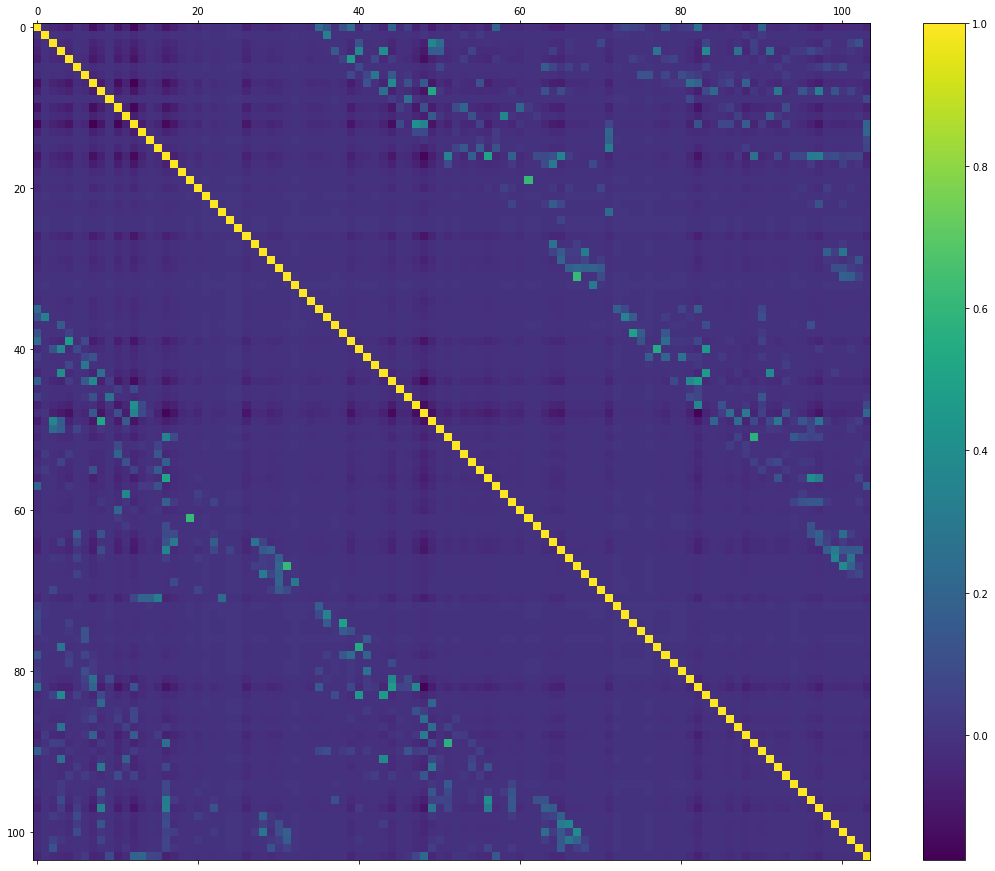

In [14]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(listed.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10);

#no exceptionally high correlations

In [15]:
#produce a wordplot 
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [16]:
movie = netflix.loc[netflix['type_Movie']==1]
title=movie['title'].apply(str)

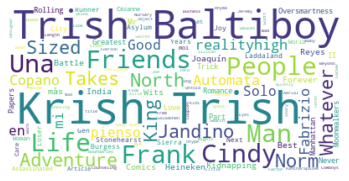

In [17]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(title))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

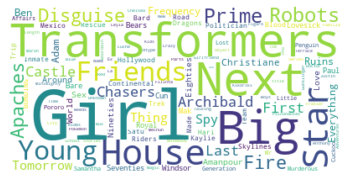

In [18]:
tv = netflix.loc[netflix['type_TV Show']==1]
title=tv['title'].apply(str)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(title))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()